In [27]:
import pandas as pd
import numpy as np

abalone = pd.read_csv('abalone.data', header=None)

abalone.columns = [
"Sex",
"Length",
"Diameter",
"Height",
"Whole weight",
"Shucked weight",
"Viscera weight",
"Shell weight",
"Rings",
]

abalone = abalone.drop("Sex", axis=1)

abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [42]:
# Compute the correlation matrix for numeric columns
correlation_matrix = abalone.corr()

# Extract correlations of all columns with "Rings"
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

knn_model = KNeighborsRegressor(n_neighbors=3)

knn_model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Predict target values for the training data using the KNN model
train_preds = knn_model.predict(X_train)

# Calculate the Mean Squared Error (MSE) between actual and predicted values
mse = mean_squared_error(y_train, train_preds)

# Compute the Root Mean Squared Error (RMSE) by taking the square root of MSE
rmse = sqrt(mse)
rmse

1.6538366794859511

In [31]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.375417924000521

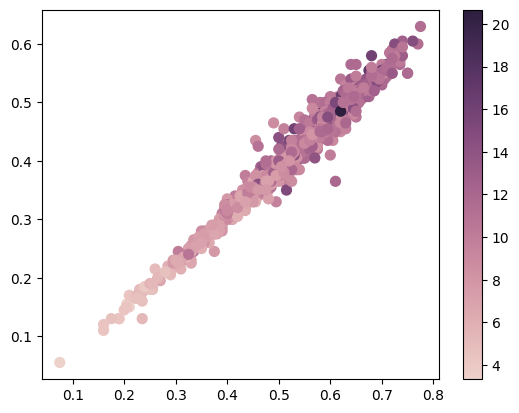

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cubehelix color palette for the scatter plot
cmap = sns.cubehelix_palette(as_cmap=True)

# Create a new figure and axis for the plot
f, ax = plt.subplots()

# Create a scatter plot of the test data
# X_test[:, 0] and X_test[:, 1] represent the first two features
# c=test_preds uses predictions as the color values
# s=50 sets the size of the scatter points
# cmap specifies the colormap
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)

# Add a colorbar to the figure to indicate the mapping of colors to values
f.colorbar(points)

# Display the plot
plt.show()

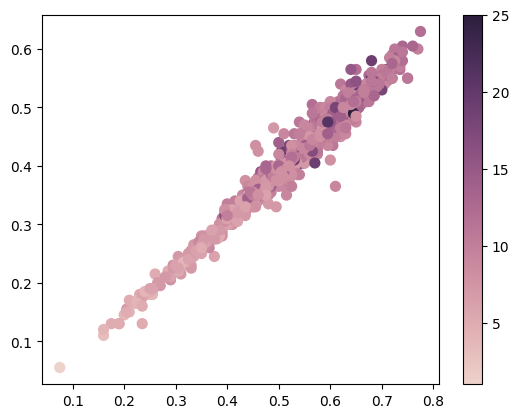

In [33]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV

# Define a dictionary of hyperparameters to test, specifying the range of neighbors (k)
parameters = {"n_neighbors": range(1, 50)}

# Initialize GridSearchCV with KNeighborsRegressor and the parameter grid
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)

# Perform a grid search to find the best hyperparameter (number of neighbors) for the model
gridsearch.fit(X_train, y_train)

# Retrieve the best parameters found by GridSearchCV
gridsearch.best_params_

{'n_neighbors': 25}

In [35]:
# Predict target values for the training data using the best GridSearchCV model
train_preds_grid = gridsearch.predict(X_train)

# Calculate the Mean Squared Error (MSE) for the training data
train_mse = mean_squared_error(y_train, train_preds_grid)

# Compute the Root Mean Squared Error (RMSE) for the training data
train_rmse = sqrt(train_mse)

# Predict target values for the test data using the best GridSearchCV model
test_preds_grid = gridsearch.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the test data
test_mse = mean_squared_error(y_test, test_preds_grid)

# Compute the Root Mean Squared Error (RMSE) for the test data
test_rmse = sqrt(test_mse)

# Print the RMSE for both training and test data
print(train_rmse, test_rmse)




2.0731180327543384 2.1700197339962175


In [ ]:
# Define a parameter grid to search over multiple hyperparameters
# Includes the number of neighbors and weight options
parameters = {
    "n_neighbors": range(1, 50),       # Test k values from 1 to 49
    "weights": ["uniform", "distance"] # Test both 'uniform' and 'distance' weighting
}

# Initialize GridSearchCV with KNeighborsRegressor and the parameter grid
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)

# Perform a grid search to find the best hyperparameters for the model
gridsearch.fit(X_train, y_train)

# Retrieve the best combination of parameters found by GridSearchCV
gridsearch.best_params_

# Predict target values for the test data using the best model from GridSearchCV
test_preds_grid = gridsearch.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the test data
test_mse = mean_squared_error(y_test, test_preds_grid)

# Compute the Root Mean Squared Error (RMSE) for the test data
test_rmse = sqrt(test_mse)

# Output the RMSE for the test data
test_rmse

2.1634265584947485

In [37]:
# Extract the best number of neighbors (k) from the grid search results
best_k = gridsearch.best_params_["n_neighbors"]

# Extract the best weight type ('uniform' or 'distance') from the grid search results
best_weights = gridsearch.best_params_["weights"]

# Create a new KNeighborsRegressor model with the best hyperparameters
bagged_knn = KNeighborsRegressor(
    n_neighbors=best_k,   # Set the optimal number of neighbors
    weights=best_weights  # Set the optimal weight strategy
)

In [38]:
from sklearn.ensemble import BaggingRegressor
# Create a BaggingRegressor model using the optimized KNeighborsRegressor (bagged_knn)
# n_estimators=100 specifies the number of base estimators (KNN models) to use in the ensemble
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [ ]:
# Train the BaggingRegressor model on the training data
bagging_model.fit(X_train, y_train)

# Predict target values for the test data using the trained bagging model
test_preds_grid = bagging_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the test data predictions
test_mse = mean_squared_error(y_test, test_preds_grid)

# Compute the Root Mean Squared Error (RMSE) for the test data
test_rmse = sqrt(test_mse)

# Output the RMSE for the test data
test_rmse

2.159465778280947

This notebook demonstrates the use of machine learning techniques for regression tasks, specifically focusing on optimising a **K-Nearest Neighbors (KNN) Regressor** and enhancing its performance through **bagging**. The key steps include:

1. **Loading and Preprocessing Data**:
    
    - The dataset is loaded, and necessary preprocessing (e.g., dropping non-numerical columns) is performed.
2. **Hyperparameter Optimisation**:
    
    - GridSearchCV is used to find the best hyperparameters for the KNN model, such as the number of neighbors (`n_neighbors`) and the weighting scheme (`weights`).
3. **Model Evaluation**:
    
    - The optimised KNN model is evaluated using metrics like Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) on training and test datasets.
4. **Bagging Implementation**:
    
    - To improve model performance and reduce overfitting, a **BaggingRegressor** is created using the optimised KNN model as the base estimator.
    - Bagging aggregates predictions from multiple KNN models (trained on random subsets of the data) to enhance overall predictive accuracy.
5. **Final Model Evaluation**:
    
    - The bagging model's predictions are evaluated on the test data, with the RMSE reported as a measure of its performance.